# Introduction


The objective is to create a **linear regression model** for a given dataset( House Sales in King County, USA). The overall idea of regression is to examine two things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.

**Linear Regression Analysis** consists of more than just fitting a linear line through a cloud of data points.  It consists of 3 stages – (1) analyzing the correlation and directionality of the data, (2) estimating the model, i.e., fitting the line, and (3) evaluating the validity and usefulness of the model.

## Regressions Performed


**Simple Linear Regression:** <br>
<br>
1) 'bedrooms' vs 'price'<br>
2) 'grade' vs 'price'<br>
                         
**Multiple Regression:** <br><br>
1) 'bedrooms','grade', 'sqft_living', 'sqft_above'<br>
2) 'bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade',                                     'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'

**Polynomial Regression:**<br>
<br> 1) degree=2<br>
2) degree=3


# Data

## Description

In this dataset we have to predict the **sales price of houses in King County, Seattle**. It includes homes sold between May 2014 and May 2015. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

The dataset cantains 20 house features plus the price, along with 21613 observations.

The description for the 20 features is given below:

1. id :- It is the unique numeric number assigned to each house being sold.
2. date :- It is the date on which the house was sold out.
3. price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
4. bedrooms :- It determines number of bedrooms in a house.
5. bathrooms :- It determines number of bathrooms in a bedroom of a house.
6. sqft_living :- It is the measurement variable which determines the measurement of house in square foot.
7. sqft_lot : It is also the measurement variable which determines square foot of the lot.
8. floors: It determines total floors means levels of house.
9. waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
10. view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
11. condition : It determines the overall condition of a house on a scale of 1 to 5.
12. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11
13. sqft_above : It determines square footage of house apart from basement.
14. sqft_basement : It determines square footage of the basement of the house.
15. yr_built : It detrmines the date of building of the house.
16. yr_renovated : It detrmines year of renovation of house.
17. zipcode : It determines the zipcode of the location of the house.
18. lat : It determines the latitude of the location of the house.
19. long : It determines the longitude of the location of the house.
20. sqft_living15 : Living room area in 2015(implies-- some renovations)
21. sqft_lot15 : lotSize area in 2015(implies-- some renovations)

By observing the data, we can know that the **price is dependent on various features** like bedrooms(which is most dependent feature), bathrooms, sqft_living(second most important feature), sqft_lot, floors etc. The price is also dependent on the location of the house where it is present. The other features like waterfront, view are less dependent on the price. Of all the records, there are **no missing values, which helps us creating better model.**

First, we **import** the required libraries like pandas, numpy, seaborn, matplotlib. Now import the **csv file.** Now we should get to know how the data is, what datatype using info function. We observe that date is in 'object' format. To know the no of rows and columns we use shape function. Describe the dataframe to know the mean, minumum, ,maximum, standard deviation, percentiles.

Then plot graphs for visualization and then we do simple regression using 'bedrooms', multiple regression and polynomial regression.


## Import and initialization

In [ ]:
# importing numpy and pandas, seaborn

import numpy as np
# Numpy provides functionality for performing mathematical operations on arrays and matrices.
# linear algebra

import pandas as pd
# The pandas provides data structures for efficiently storing and manipulating large datasets, as well as a wide range of functions for data cleaning, preparation, and analysis.
# datapreprocessing, CSV file I/O

import seaborn as sns
# The seaborn provides a high-level interface for creating informative and attractive statistical graphics.
# for plotting graphs

import matplotlib.pyplot as plt
# Matplotlib.pyplot is a collection of functions that provides a MATLAB-like plotting framework in Python.


Now import the data stored in the csv file.

In [ ]:
# The first method to read the scv file from Github.

csvData = 'https://raw.githubusercontent.com/Yokhong/CIVL4210/main/H3_housing_price_regression/kc_house_data.csv'
# We save the hyperlink of the data form Github.

df = pd.read_csv(csvData)
# And we directly copy the scv file from Github to random access memory (RAM).

Try to use another method by yourself!😊

In [ ]:
# The second method to read the scv file from Github.😊

#import urllib.request as req
# The urllib.request provides a set of functions for opening URLs (Uniform Resource Locators) and retrieving their contents.

#url = 'https://raw.githubusercontent.com/Yokhong/CIVL4210/main/H3_housing_price_regression/kc_house_data.csv'
# We save the hyperlink of the data form Github.

#req.urlretrieve(url, "/content/kc_house_data.csv")
#The urllib.request.urlretrieve is used to download a file from a URL and save it to a local directory.

#file="kc_house_data.csv" # relative address (computing)
# Now, we can  see the scv file in the folder.

#df = pd.read_csv("kc_house_data.csv")
# And we copy the scv file from Colab's folder to random access memory (RAM).

## Check the data

Now we should get to know how the data is, what datatype using info function. We observe that date is in 'object' format. To know the no of rows and columns we use shape function. Describe the dataframe to know the mean, minumum, maximum, standard deviation, percentiles.

Then plot graphs for visualization and then we do simple regression using 'bedrooms', multiple regression and polynomial regression.

In [ ]:
df.info()
# df.info() is used to print a concise summary of a DataFrame.
# This method is useful for quickly examining the structure and contents of a DataFrame, including missing values and data types.
# It can also be used to identify potential memory usage issues, as it shows the memory usage of the DataFrame.
# When called on a DataFrame object df, df.info() outputs the following information:
#  The number of rows and columns in the DataFrame
#  The column names and their data types
#  The number of non-null values in each column
#  The memory usage of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.head()
#df.head(16) # Try to change the number and find the difference with the default.😊
# The df.head() is used to display the first few rows of a DataFrame.
# df.head() outputs the first 5 rows of the DataFrame by default.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#finding no of rows and columns

df.shape
# The df.shape returns a tuple representing the dimensions of a DataFrame.

(21613, 21)

In [ ]:
df.isnull().sum()
# The df.isnull().sum() is used to count the number of missing values (null values) in each column of a DataFrame.

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
df['bedrooms'].value_counts()
# The df[].value_counts() is used to count the number of occurrences of each unique value in a column of a DataFrame.
# This method is useful for understanding the distribution of values in a column and for identifying the most common values.

,count
bedrooms,
3,9824
4,6882
2,2760
5,1601
6,272
1,199
7,38
0,13
8,13


Try to use other labels and find out what happens.😊

<font size = "8">Question 1 (1 point): count the number of occurrences of each unique value in "condition"</font>

# Statistics and graphing

<Axes: title={'center': 'house prices by sqft_living'}, xlabel='sqft_living', ylabel='house prices'>

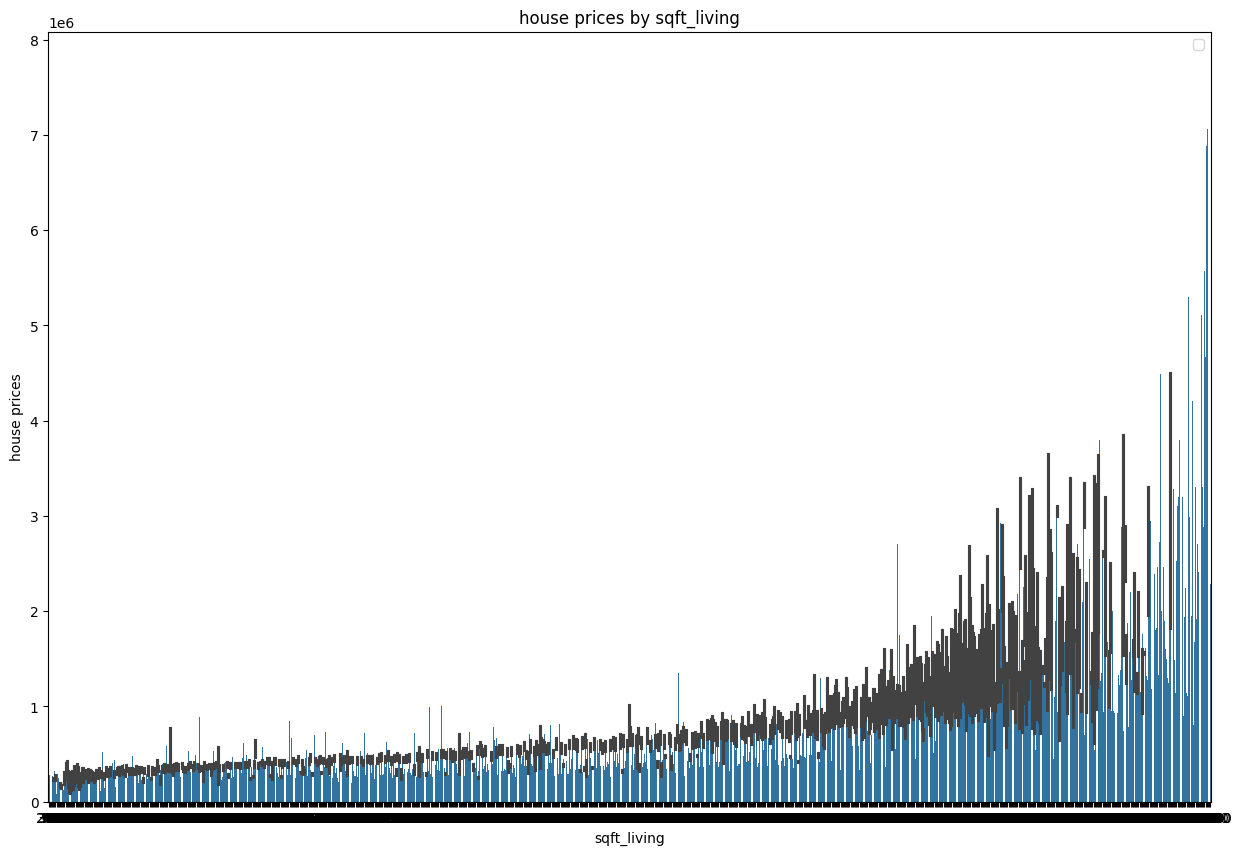

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
# The plt.subplots() is used to create a new figure and one or more subplots.
# fig is a variable that represents the entire figure, and axes is a variable that represents the subplot(s).
# The subplots() method takes three arguments:
# nrows: the number of rows of subplots to create (default is 1)
# ncols: the number of columns of subplots to create (default is 1)
# figsize: a tuple specifying the width and height of the figure in inches (default is (6.4, 4.8))

plt.title('house prices by sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('house prices')
plt.legend()
# The plt.legend() is used to add a legend to a plot.
sns.barplot(x='sqft_living',y='price',data=df)
# The sns.barplot() is used to create a bar plot.
# data: the DataFrame containing the data to be plotted

(array([1.825e+04, 3.255e+03, 1.010e+02, 5.000e+00, 2.000e+00]),
 array([  290.,  2940.,  5590.,  8240., 10890., 13540.]),
 <BarContainer object of 5 artists>)

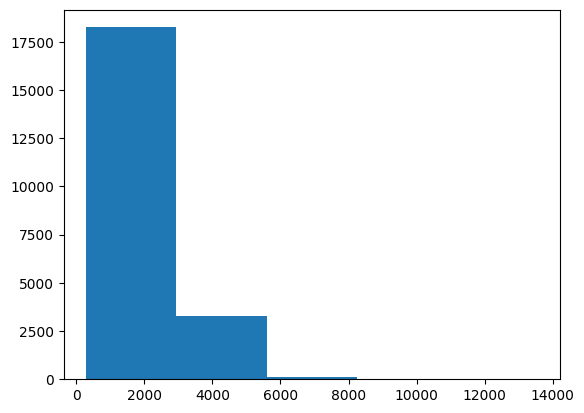

In [ ]:
plt.hist('sqft_living',data=df,bins=5) # Try to use other labels and find out what happens.😊
# The plt.hist() is used to create a histogram.
# bins: the number of bins to use in the histogram (default is 10)

<ipython-input-14-a76fd2fe2517>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)


<Axes: xlabel='sqft_living', ylabel='Density'>

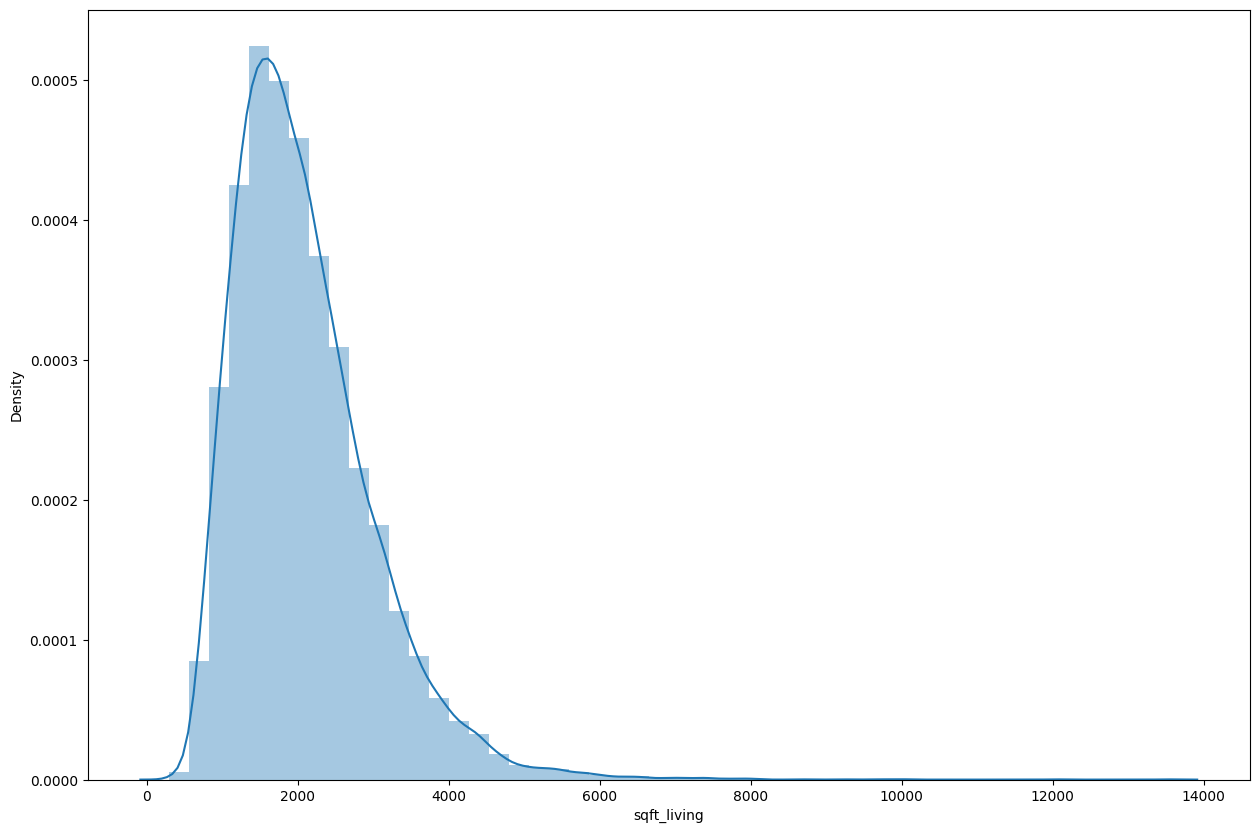

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(df['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)
# The sns.distplot() is used to create a distribution plot.
# hist: a boolean value indicating whether to show a histogram of the data (default is True)
# kde: a boolean value indicating whether to show a kernel density estimate of the data (default is True)
# rug: a boolean value indicating whether to show a rug plot of the data (default is False)
# norm_hist: a boolean value indicating whether to normalize the histogram to a density plot (default is True)

In [ ]:
print('Mean',round(df['sqft_living'].mean(),2))
# Printing the mean (average) value of the 'sqft_living' column
# The value is rounded to two decimal places using the round() function.
print('Median',df['sqft_living'].median())
# Printing the median value of the 'sqft_living' column
print('Mode',df['sqft_living'].mode()[0])
# The mode() function is used to calculate the mode value of the dataset.
# The [0] at the end of the line of code is used to select the first mode value from the list of mode values (if there are multiple mode values).

Mean 2079.9
Median 1910.0
Mode 1300


In [ ]:
len(df[df['sqft_living']==1300])
# Counting the number of instances where a specific value appears in a particular column of a DataFrame.
# Mode 1300

138

<font size = "8">Question 2 (2 points): please draw a bar plot of 'house prices by sqft_above' and a density plot of sqft_above</font>

<font size = "6">House Price Correlation Heatmap</font>

A house price correlation heatmap shows the relationships between different factors that can affect house prices, such as location, size, number of bedrooms, or amenities. It uses colors to indicate the strength and direction of these relationships: for example, dark colors might show a strong positive correlation, while lighter colors indicate weak or no correlation. This helps identify which factors are most related to house prices.

1. Variables Analyzed:

  Common variables include square footage, number of bedrooms, bathrooms, age of the home, location, and features like pools or garages.

2. Correlation Coefficient:

  The heatmap uses a correlation coefficient (usually between -1 and 1) to show relationships:

    1 means a perfect positive correlation (as one increases, the other does too).

    -1 means a perfect negative correlation (as one increases, the other decreases).

    0 means no correlation.

3. Color Coding:

  Different colors represent different levels of correlation. For example:

    Darker colors may indicate stronger correlations.

    Lighter colors may indicate weaker correlations.



It helps real estate professionals and buyers understand which features most influence house prices. Buyers can use this information to make informed decisions about what features to prioritize.
Sellers can understand what aspects of their home might increase its value.

For example, if the heatmap shows a strong correlation between square footage and price, it suggests larger homes tend to sell for more.


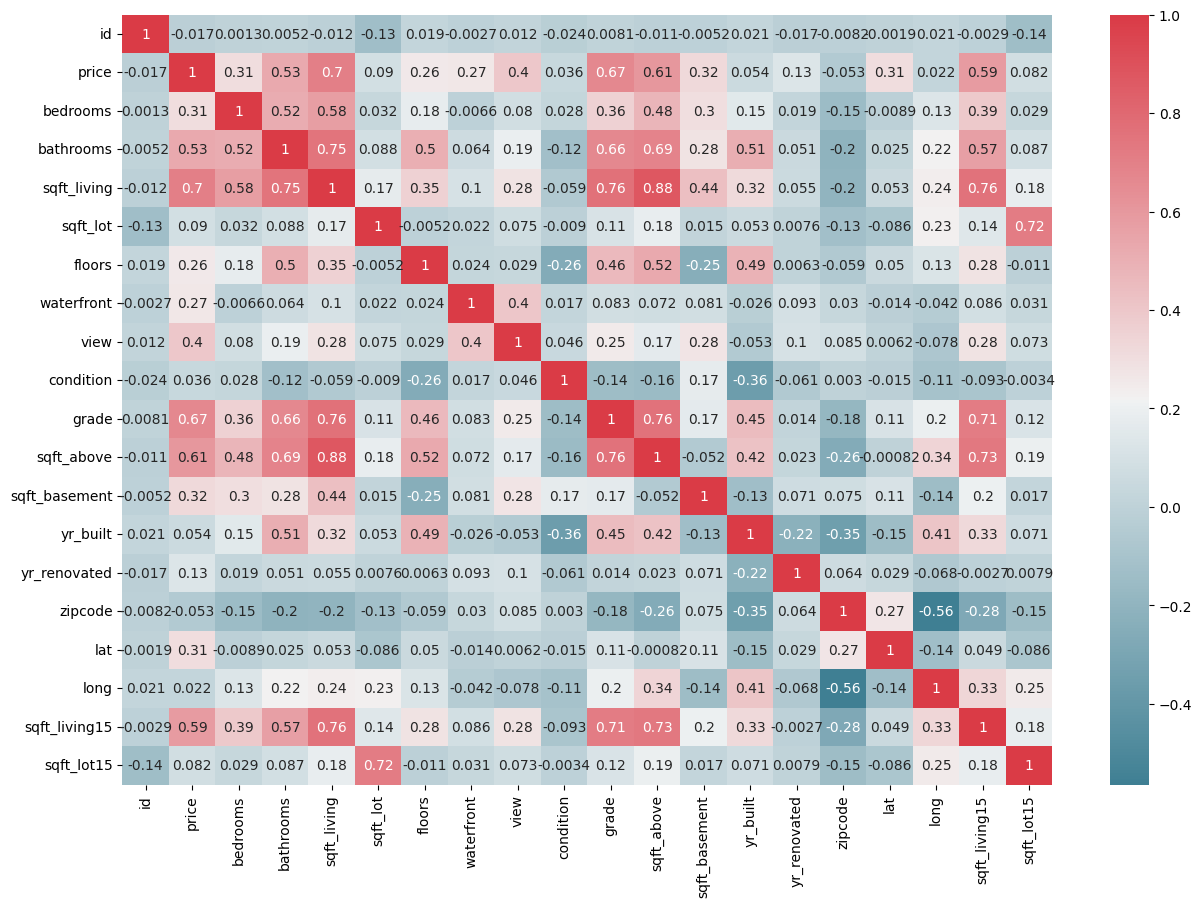

In [ ]:
def correlation_heatmap(df1):
# Just define a function
    _,ax=plt.subplots(figsize=(15,10))
# The subplots() function returns two values: a Figure object and an Axes object. In this code, the Figure object is not needed, so it is assigned to the underscore symbol (_).
    colormap=sns.diverging_palette(220,10,as_cmap=True)
# The diverging_palette() function creates a color palette that varies smoothly between two specified colors.
# The two colors are specified using the numbers 220 and 10, which correspond to hues on a color wheel.
# The as_cmap parameter is set to True, which means that the resulting color palette will be returned as a matplotlib colormap object.
    sns.heatmap(df.corr(numeric_only=True),annot=True,cmap=colormap)
    #sns.heatmap(df.select_dtypes(np.number),annot=True,cmap=colormap)

# Creating a heatmap plot using the Seaborn library.
# The corr() function returns a matrix of pairwise correlations between columns of the DataFrame.
# The 'annot' parameter is set to True, which means that the numeric values of the correlation coefficients will be displayed on the heatmap.

correlation_heatmap(df)
# Using this function

# Simple Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
# The train_test_split function is a commonly used function in machine learning that is used to split a dataset into two subsets: a training set and a testing set.

from sklearn import linear_model
# The linear_model module contains a variety of linear regression models that can be used for predictive modeling in machine learning.

from sklearn.neighbors import KNeighborsRegressor
# The KNeighborsRegressor model works by finding the k nearest neighbors to a given input in the training data, and then making a prediction based on the average value of the target variable for those neighbors.

from sklearn.preprocessing import PolynomialFeatures
# The PolynomialFeatures class is a data preprocessing tool that can be used to create polynomial features from a set of input features.
# Polynomial features are additional features that are created by raising the original features to a power, and then multiplying them together.
# Creating polynomial features can be useful for improving the performance of machine learning models that assume a linear relationship between the input features and the target variable.
# By including polynomial features, the model can capture more complex relationships between the input features and the target variable.

from sklearn import metrics
# These functions can be used to compare the predicted values of a model with the actual values, and to calculate various metrics that indicate how well the model is performing.
# Some common metrics that are included in the metrics module include mean squared error (MSE), mean absolute error (MAE), R-squared (R2), and confusion matrix.

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# This line enables the rendering of Matplotlib plots directly in the notebook interface.

In [ ]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
# After class, you can try to change the number of 'train_size=0.8,random_state=3' and find out what happens.😊
# This line of code is using the train_test_split function to split 'df' into two subsets: a training set and a testing set.
# The 'train_size' parameter is set to 0.8, which means that 80% of the data will be used for training the machine learning model, and 20% of the data will be used for testing the model.
# The 'random_state' parameter is set to 3, which ensures that the split will be the same every time the code is run, allowing for reproducibility of the results.

reg=linear_model.LinearRegression()
# The LinearRegression class is a machine learning model that can be used for linear regression tasks, which involve predicting a continuous numerical value for a given input.
# The model works by fitting a linear equation to the training data, where the coefficients of the equation represent the weights of the input features.

x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
# Try to use other labels and find out what happens.😊
# The np.array() function is used to convert the 'sqft_living' column to a NumPy array.
# The reshape() method is then used to reshape the NumPy array into a 2-dimensional array with a single column and as many rows as there are data points in the 'sqft_living' column.
# The '-1' parameter in the reshape() method is used to automatically determine the number of rows based on the size of the 'sqft_living' column.
# Reshaping the NumPy array in this way is necessary because many machine learning models  expect the input data to be in a specific format.

reg.fit(x_train,y_train)
# The fit() method will use the training data to learn the coefficients of the regression model that best fits the data.
# Once the model is fitted, it can be used to make predictions on new data.

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
# Remember, if you change the label of training_data, please change the test_data into the same label.😊
# The .reshape(-1,1) method is used to reshape the array into a 2-dimensional array with only one column.
# The -1 parameter in the method specifies that the number of rows should be inferred based on the length of the input array.
# The resulting x_test array will have dimensions (n,1), where n is the number of rows in the 'sqft_living' column of test_data.

pred=reg.predict(x_test)
# This line uses a trained regression model reg to make predictions on a new set of data x_test.
# The predicted values are based on the coefficients learned by the model during the training phase, and the input features in x_test.

print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
# The mean_squared_error() function  takes two parameters: the true values y_test and the predicted values pred.
# The function returns a single value, which is the average of the squared differences between the true and predicted values.

print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
# The np.sqrt() function calculates the square root of a given value.
# The round() function is used to round the RMSE to two decimal places.

print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
# The score() method is used to calculate the R-squared value of the model.The R-squared value represents the proportion of the variance in the target variable that is explained by the independent variables in the model.
# The R-squared value can range from 0 to 1, with higher values indicating better performance.
# A value of 1 indicates that the model perfectly fits the data, while a value of 0 indicates that the model does not explain any of the variance in the target variable.

print('intercept',reg.intercept_)
# The intercept term is the value of the dependent variable when all independent variables are equal to zero.
# In the context of linear regression, it represents the point where the regression line intersects the y-axis.

print('coefficient',reg.coef_)
# In the context of linear regression, the coefficients represent the change in the dependent variable for a unit change in the corresponding independent variable.

linear model
Sqaured mean error 254289.15
R squared training 0.492
R sqaured testing 0.496
intercept [-47235.8113029]
coefficient [[282.2468152]]


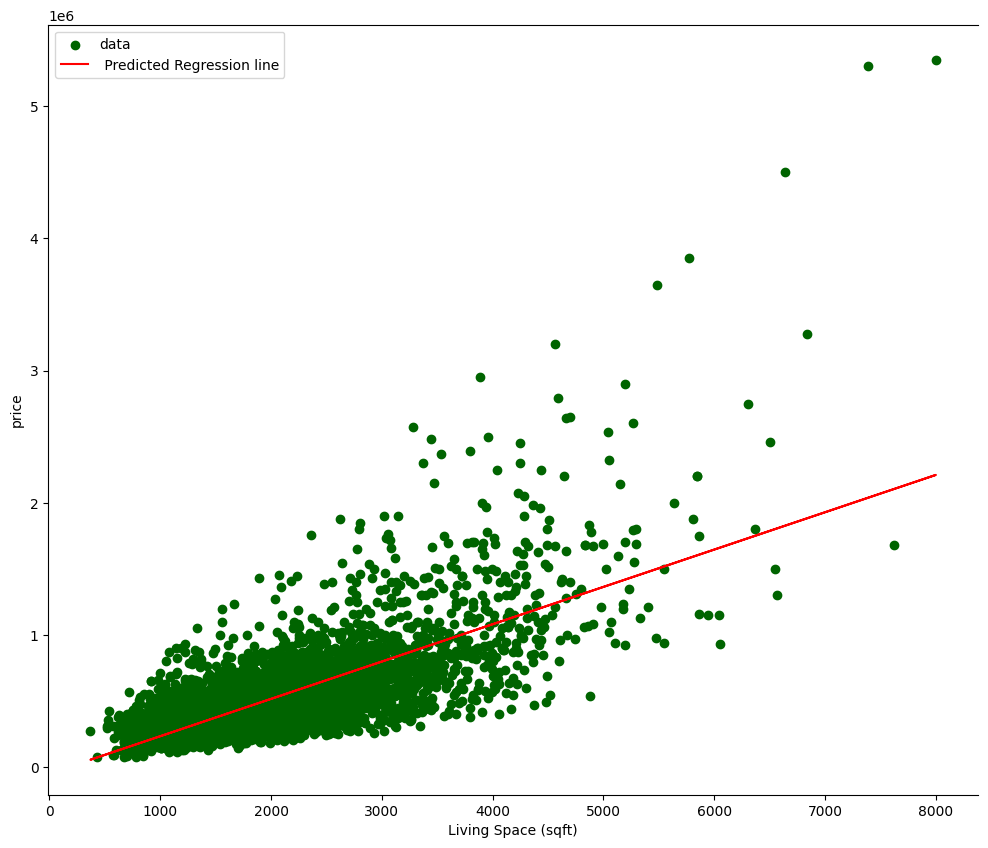

In [ ]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data') # Try to change the color to pink or yellow.😊
# Create a scatter plot
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line') # Try to change the color to pink or yellow.😊
# Draw the predicted regression line
# Try to use other labels and find out what happens.😊
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
# Set the visibility of the right spine (or edge) of the plot to False.

<font size = "8">Question 3 (2 points): please draw a Simple Linear Regression plot of 'house prices by sqft_above' and a Simple Linear Regression plot of 'house prices by grade'</font>

# Multiple Regression

<Axes: xlabel='bathrooms', ylabel='price'>

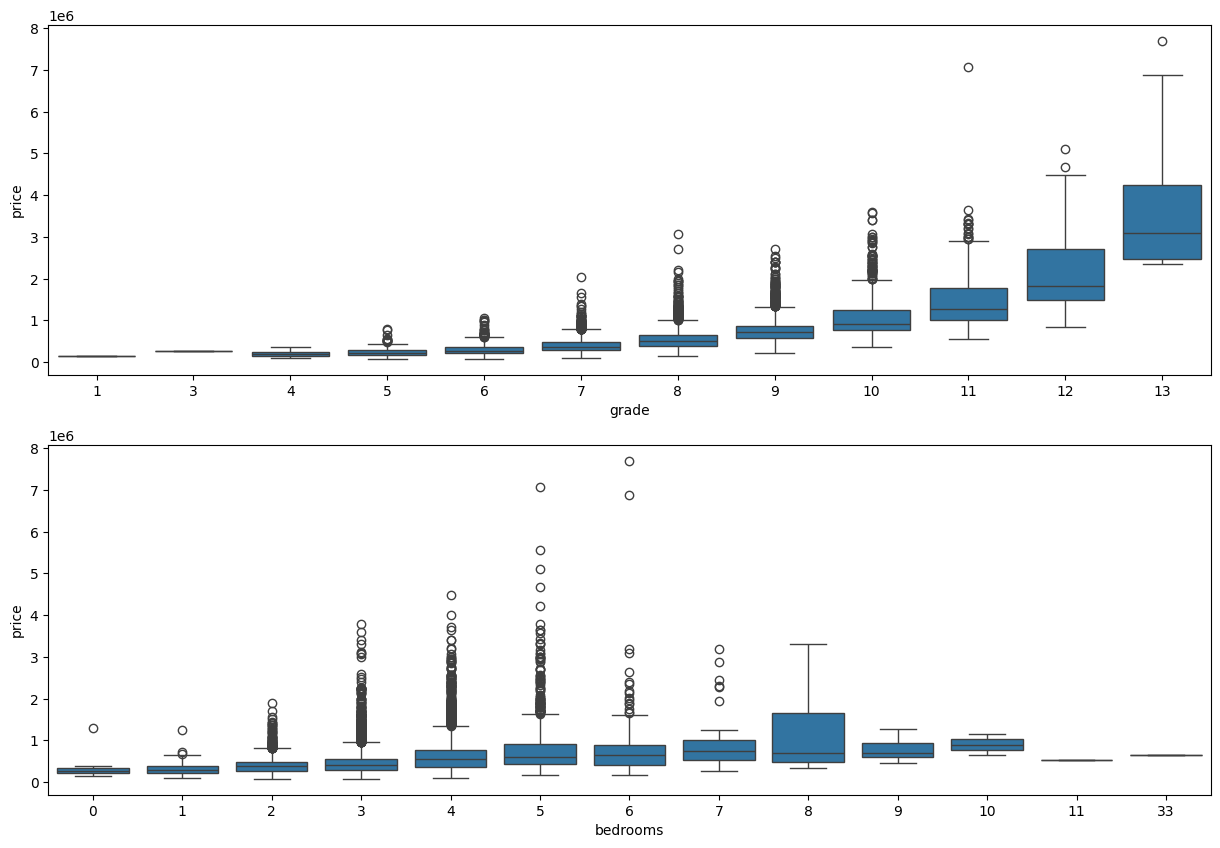

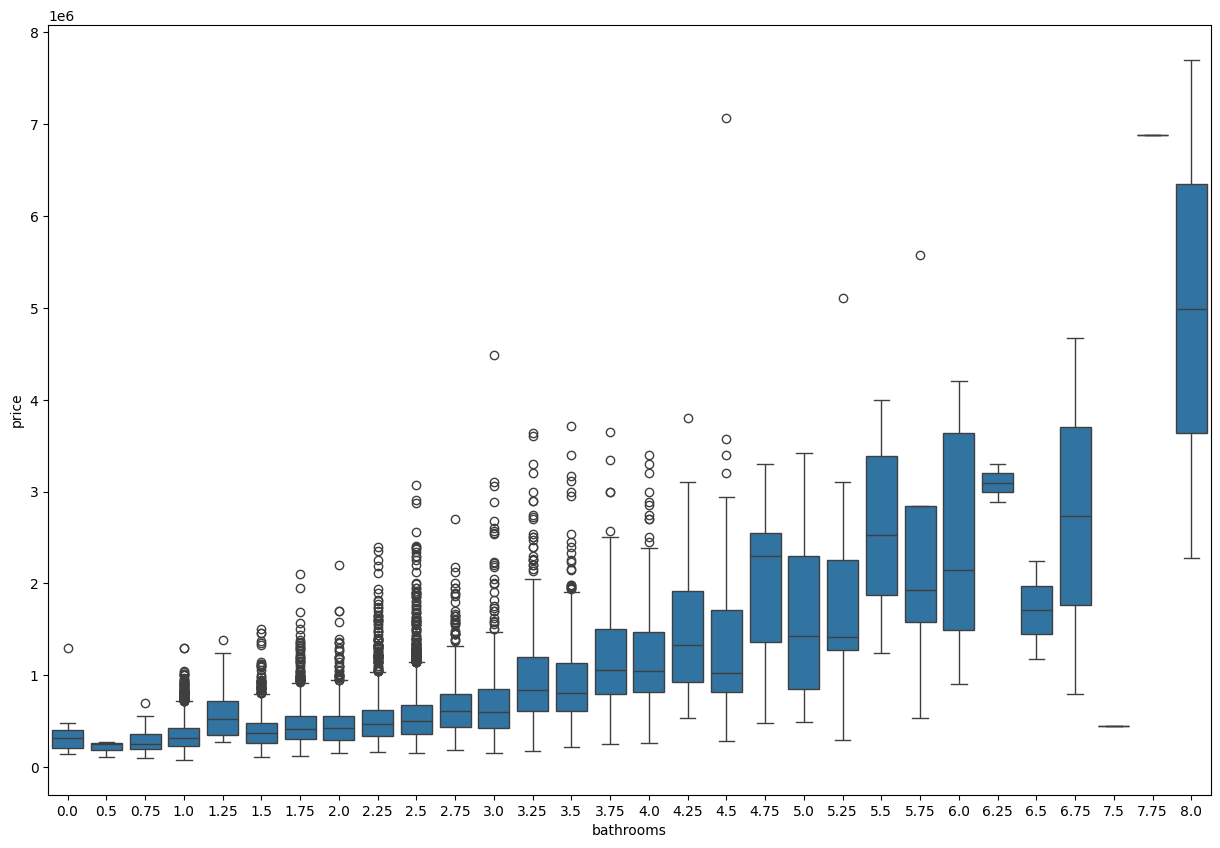

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=train_data['grade'],y=train_data['price'],ax=ax[0])
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'])
# Create a box plot using Seaborn library.
# A box plot is a type of plot that displays the distribution of a dataset through their quartiles.
# The box represents the interquartile range (IQR), which is the range between the 25th and 75th percentiles of the data.
# The line inside the box represents the median value, and the whiskers extending from the box represent the range of the data, excluding the outliers.
# Outliers are plotted as individual points beyond the whiskers.
# The ax parameter specifies the subplot where the box plot will be plotted.

In [ ]:
features1=['bedrooms','grade','sqft_living','sqft_above']
reg=linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price']) # Different from reg.fit(x_train,y_train), we use the train_data[features1].
pred=reg.predict(test_data[features1])
print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(train_data[features1],train_data['price']),3))
print('R squared training', round(reg.score(test_data[features1],test_data['price']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

complex_model 1
mean squared error(MSE) 239014.4
R squared training 0.548
R squared training 0.555
Intercept:  -523645.7841468287
Coefficient: [-4.33050242e+04  1.03455986e+05  2.73023590e+02 -8.38875593e+01]


In [ ]:
features1 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Complex Model_2
Mean Squared Error (MSE)  205244.56
R-squared (training)  0.655
R-squared (testing)  0.672
Intercept:  -32330182.91167583
Coefficient: [-2.62100082e+04 -3.47626774e+03  1.32069090e+02 -1.31506101e-01
 -3.22608866e+04  5.65731080e+05  6.81843494e+04  8.17559446e+04
  6.62246805e+01  6.58444098e+01  6.71765072e+05  4.60648979e+00]


# Polynomial Regression

In [ ]:
polyfeat=PolynomialFeatures(degree=2)
# PolynomialFeatures is a class that is used to generate a new set of features by raising the original features to a given degree.
# In this case, the degree is set to 2, which means that the original features will be raised to the second power.(x^2)

xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])
# The fit_transform() transforms the original features in the training data into a new set of polynomial features.
# The fit_transform() method first fits the polyfeat object to the training data to learn the parameters of the transformation.
# and then, the fit_transform() applies the transformation to the training data to generate the new set of polynomial features.

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_3
Mean Squared Error (MSE)  175811.48
R-squared (training)  0.758
R-squared (testing)  0.759


In [ ]:
polyfeat=PolynomialFeatures(degree=3)
#  In this case, the degree is set to 3, which means that the original features will be raised to the third power.(x^3)

xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('complex model_4')
mean_squared_error=metrics.mean_squared_error(test_data['price'],polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

complex model_4
Mean Squared Error (MSE)  207632.99
R-squared (training)  0.776
R-squared (testing)  0.664


# Observation/Result

Complex Model_3 gives us R-squared (testing) score of 0.759. From above reports, we can conclude that Polynomial regression is best solution.